In [1]:
#importing libraries 
import pandas as pd + 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import classification_report, confusion_matrix 


In [2]:
df=pd.read_csv('loan_approval_dataset.csv')

In [3]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [5]:
df.isnull()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,False,False,False,False,False,False,False,False,False,False,False,False,False
4265,False,False,False,False,False,False,False,False,False,False,False,False,False
4266,False,False,False,False,False,False,False,False,False,False,False,False,False
4267,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [7]:
df.drop(columns=['loan_id',' no_of_dependents',' self_employed',' income_annum',' loan_term',' residential_assets_value',' commercial_assets_value',' luxury_assets_value',' bank_asset_value'],inplace=True,axis=1)

In [8]:
df.drop(columns=(' education'),inplace=True)

In [9]:
df[' loan_status'].value_counts()

 Approved    2656
 Rejected    1613
Name:  loan_status, dtype: int64

In [10]:
df[' cibil_score'].mean()

599.9360505973295

In [11]:
df.describe()

,loan_amount,cibil_score
count,4.269000e+03,4269.000000
mean,1.513345e+07,599.936051
std,9.043363e+06,172.430401
min,3.000000e+05,300.000000
25%,7.700000e+06,453.000000
50%,1.450000e+07,600.000000
75%,2.150000e+07,748.000000
max,3.950000e+07,900.000000


In [12]:
df

,loan_amount,cibil_score,loan_status
0,29900000,778,Approved
1,12200000,417,Rejected
2,29700000,506,Rejected
3,30700000,467,Rejected
4,24200000,382,Rejected
...,...,...,...
4264,2300000,317,Rejected
4265,11300000,559,Approved
4266,23900000,457,Rejected
4267,12800000,780,Approved


<Axes: xlabel=' loan_status', ylabel='count'>

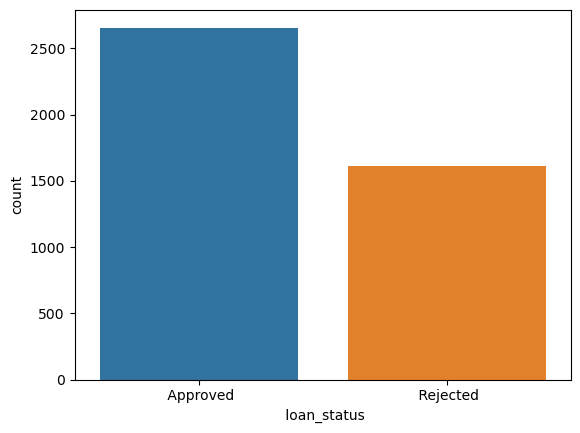

In [13]:
sns.countplot(x=' loan_status', data= df)

<Axes: xlabel=' cibil_score', ylabel='Count'>

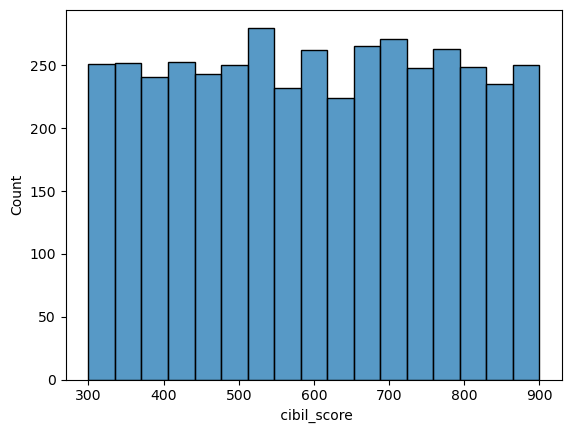

In [14]:
sns.histplot(x=' cibil_score', data= df)

C:\Users\saisr\AppData\Local\Temp\ipykernel_25980\483839832.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


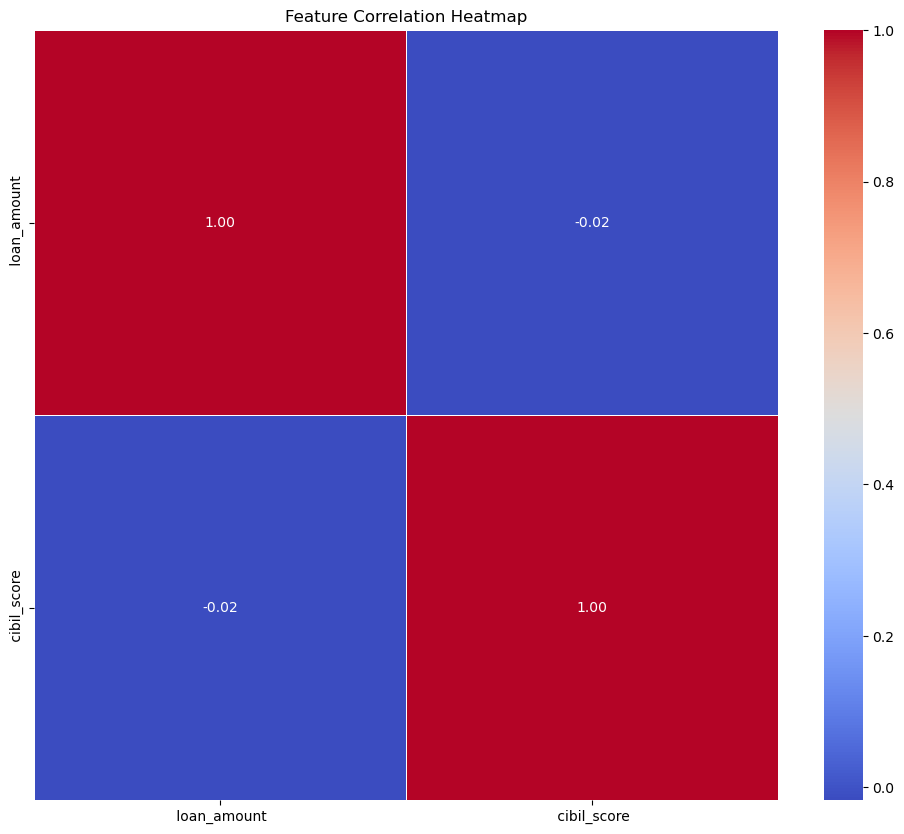

In [38]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()



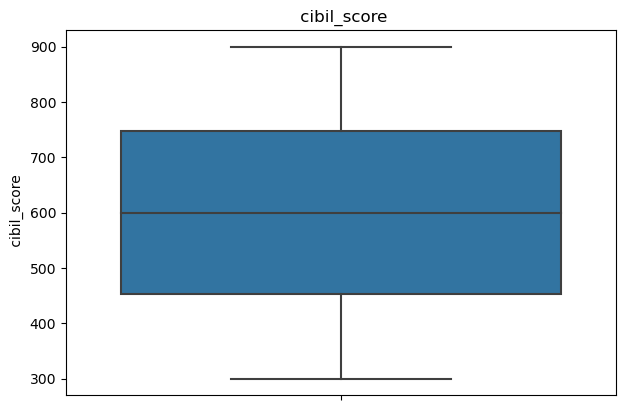

In [16]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.boxplot(y=df[' cibil_score'])
plt.title(' cibil_score')
plt.tight_layout()
plt.show()

In [17]:
def model_evaluate(model,X_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cf_matrix = confusion_matrix(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    cm_df = pd.DataFrame(cm,
                     index = ['APPROVAL','REJECTED'], 
                     columns = ['APPROVAL','REJECTED'])

    #Plotting the confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, annot=True, cmap="Oranges",linecolor="gray")
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()
 

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [19]:
X = df[[' cibil_score',' loan_amount']]
y=df[' loan_status']

In [20]:
x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [22]:
lr=LogisticRegression()

In [23]:
lr.fit(x_train,y_train)


LogisticRegression()

In [24]:
new_applicant = [[12200000,417]] 
x=lr.predict(new_applicant)
if x==' Approved':
    print("your loan has been successfully Approved")
else:
    print("sorry,your loan has been rejected")

your loan has been successfully Approved


C:\Users\saisr\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

    Approved       0.69      0.94      0.79       536
    Rejected       0.74      0.27      0.40       318

    accuracy                           0.69       854
   macro avg       0.71      0.61      0.60       854
weighted avg       0.71      0.69      0.65       854



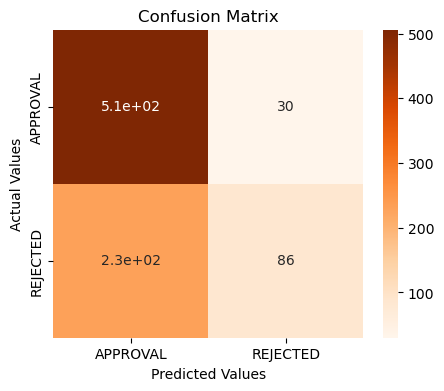

In [25]:
model_evaluate(lr,x_test)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
k = 3  
knn = KNeighborsClassifier(n_neighbors=k)

In [28]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.85


In [30]:
y_pred

array([' Rejected', ' Approved', ' Rejected', ' Approved', ' Approved',
       ' Approved', ' Approved', ' Rejected', ' Approved', ' Rejected',
       ' Rejected', ' Approved', ' Approved', ' Rejected', ' Rejected',
       ' Approved', ' Approved', ' Rejected', ' Rejected', ' Rejected',
       ' Approved', ' Rejected', ' Approved', ' Rejected', ' Approved',
       ' Approved', ' Approved', ' Approved', ' Approved', ' Approved',
       ' Rejected', ' Rejected', ' Rejected', ' Approved', ' Rejected',
       ' Rejected', ' Approved', ' Approved', ' Approved', ' Rejected',
       ' Rejected', ' Approved', ' Approved', ' Approved', ' Rejected',
       ' Approved', ' Approved', ' Approved', ' Approved', ' Rejected',
       ' Approved', ' Rejected', ' Rejected', ' Approved', ' Approved',
       ' Approved', ' Approved', ' Approved', ' Rejected', ' Approved',
       ' Approved', ' Approved', ' Rejected', ' Rejected', ' Rejected',
       ' Approved', ' Approved', ' Approved', ' Approved', ' App

In [31]:
new_applicant = [[2000,0]]
x=knn.predict(new_applicant)
print(x)

[' Approved']


C:\Users\saisr\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [32]:
new_applicant = [[19000,400]]
x=knn.predict(new_applicant)
if x==' Rejected':
    print("sorry your application has reject")
else:
    print("yes,your loan has been approved")

yes,your loan has been approved


C:\Users\saisr\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

    Approved       0.89      0.87      0.88       536
    Rejected       0.78      0.82      0.80       318

    accuracy                           0.85       854
   macro avg       0.84      0.84      0.84       854
weighted avg       0.85      0.85      0.85       854



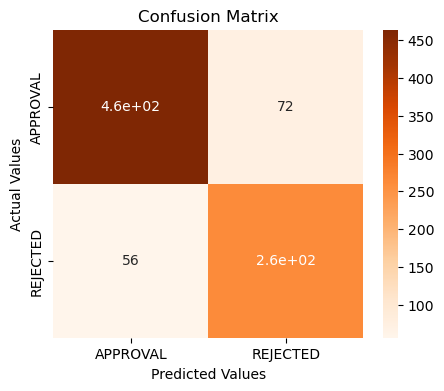

In [33]:
model_evaluate(knn,x_test)

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

    Approved       0.99      0.94      0.97       536
    Rejected       0.91      0.99      0.95       318

    accuracy                           0.96       854
   macro avg       0.95      0.96      0.96       854
weighted avg       0.96      0.96      0.96       854



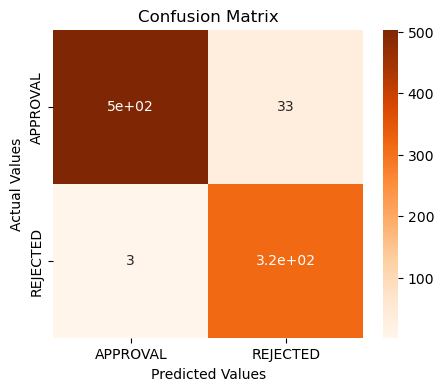

In [35]:
model_evaluate(rf_classifier,x_test)

In [36]:
new_applicant = [[600,14000]]
x=rf_classifier.predict(new_applicant)
if x==' Rejected':
    print("sorry your application has reject")
else:
    print("yes,your loan has been approved")

yes,your loan has been approved


C:\Users\saisr\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
